# Bank transaction analysis:
## The goal of this analysis is to :
### 1. Figure out where most of the monthly money being spent
### 2. Figure out how much money being spent each month and how much money is being gained

## 1. Import libraries for
-	data structures and data analysis tools (pandas)
-   numerical Python library (numpy)
-   interactive visualization (Plotly)

In [107]:
## In this section uninstalled Liraries will be installed
#pip install plotly

In [108]:
import pandas as pd
import numpy as np
import plotly.express as px

## 2. Import the Bank transaction Excel file as a DataFrame
-	Read the data from a Excel file into a DataFrame (pd.read_excel)

In [109]:
#import of the dataset
data = pd.read_excel('Data/decoded_transactions.xlsx')
data.head()

,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Betrag
0,30.06.2022,ONLINE-UEBERWEISUNG,"SVWZ+XNXTLVX PAYOPDATUM XX.XX.XXXX, XX.XX UHRI...",PPRO Payment Services SA,"-3,22"
1,30.06.2022,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+OSAK...,Osakii Mainz GmbH,-50
2,29.06.2022,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+SumU...,Landesbank Hessen-Thuringen Girozentrale,"-6,7"
3,29.06.2022,FOLGELASTSCHRIFT,EREF+XXXXXXXXXXXXX PP.XXXX.PP PAYPALMREF+XJTJX...,"PayPal (Europe) S.a r.l. et Cie, S.C.A.","-4,99"
4,28.06.2022,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REST...,RESTAURANT SAMAN,-14


# 3. Data Preperation:
- Display the first 5 lines for the DataFrame (DataFrame.head)
- lets Discover the Data and see which columns do we need for the analysis

In [110]:
data.head()

,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Betrag
0,30.06.2022,ONLINE-UEBERWEISUNG,"SVWZ+XNXTLVX PAYOPDATUM XX.XX.XXXX, XX.XX UHRI...",PPRO Payment Services SA,"-3,22"
1,30.06.2022,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+OSAK...,Osakii Mainz GmbH,-50
2,29.06.2022,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+SumU...,Landesbank Hessen-Thuringen Girozentrale,"-6,7"
3,29.06.2022,FOLGELASTSCHRIFT,EREF+XXXXXXXXXXXXX PP.XXXX.PP PAYPALMREF+XJTJX...,"PayPal (Europe) S.a r.l. et Cie, S.C.A.","-4,99"
4,28.06.2022,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REST...,RESTAURANT SAMAN,-14


### Folowing Attributes will be needed: 

- Valutadatum (Date of value):The date which the money being booked from the bank account (Booking Date)
- Verwendungszweck (Purpose of use) : details about the booking (company that booked, Date of booking, etc...)
- Betrag: The amount of money that are booked
- Buchungstext: Art of booking wether its Withdraw money from the ATM or a transaction 

### Folowing Attributes will NOT be needed: 
- Beguenstigter/Zahlungspflichtiger: Which company the did the booking ( most of the time duplicated infos form the purpose of use)




In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Valutadatum                        283 non-null    object
 1   Buchungstext                       283 non-null    object
 2   Verwendungszweck                   283 non-null    object
 3   Beguenstigter/Zahlungspflichtiger  276 non-null    object
 4   Betrag                             283 non-null    object
dtypes: object(5)
memory usage: 11.2+ KB


- The data.info() shows us the  that Beguenstigter/Zahlungspflichtiger field hast NAN values. Lets discover what are they and wether other NaN values out there!

In [112]:
data[data.isna().any(axis=1)]

,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Betrag
53,01.06.2022,ENTGELTABSCHLUSS,Entgeltabrechnungsiehe Anlage,NaN,-4
102,30.04.2022,ENTGELTABSCHLUSS,Entgeltabrechnungsiehe Anlage,NaN,-4
138,01.04.2022,ABSCHLUSS,Abrechnung XX.XX.XXXXsiehe Anlage,NaN,0
139,01.04.2022,ENTGELTABSCHLUSS,Entgeltabrechnungsiehe Anlage,NaN,"-6,85"
184,29.02.2022,ENTGELTABSCHLUSS,Entgeltabrechnungsiehe Anlage,NaN,-4
227,01.02.2022,ENTGELTABSCHLUSS,Entgeltabrechnungsiehe Anlage,NaN,-4
282,01.01.2022,ABSCHLUSS,Abrechnung XX.XX.XXXXsiehe Anlage,NaN,0


- The values represents the bank fees. we can delete them cause they are not relevant to the main goal of the Analysis

In [113]:
data.dropna(inplace=True)

In [114]:
# Validation of other NAN values exists
data[data.isna().any(axis=1)]

,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Betrag


- lets delete the not needed columns and rename the needed ones

In [115]:
#data.drop('Beguenstigter/Zahlungspflichtiger', inplace=True, axis=1)
data=data.rename(columns={'Valutadatum':'Date of value', "Verwendungszweck" : "Purpose of use",
                          "Betrag":"Booking amount","Buchungstext":"Booking text"})

- Date of value has a string value but since its a date we will convert it through dattotime to ... data type to work with it easier
- The Booking amount is a string so we have to change it to numbers(float or int) so we can work with it. I would not calculating the booked cents in the analysis so I will reform it to float type at first then to int

In [116]:
# our current Date Format: "%d.%m.%Y"
data['Date of value']=pd.to_datetime(data['Date of value'],format='%d.%m.%Y')
data['Booking amount'] = data['Booking amount'].str.replace(',', '.').astype(float)
data['Booking amount'] = data['Booking amount'].round(0).astype(int)


In [117]:
#checking wether booking ammounts are INT
data['Booking amount']

0      -3
1     -50
2      -7
3      -5
4     -14
       ..
277   -45
278    12
279   -45
280   -45
281   -20
Name: Booking amount, Length: 276, dtype: int32

- as you can see we have only dates and since we are doing yearly analysis we need only the month values from the Date:


In [118]:
data["Month"]=data["Date of value"].dt.month_name()
data

,Date of value,Booking text,Purpose of use,Beguenstigter/Zahlungspflichtiger,Booking amount,Month
0,2022-06-30,ONLINE-UEBERWEISUNG,"SVWZ+XNXTLVX PAYOPDATUM XX.XX.XXXX, XX.XX UHRI...",PPRO Payment Services SA,-3,June
1,2022-06-30,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+OSAK...,Osakii Mainz GmbH,-50,June
2,2022-06-29,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+SumU...,Landesbank Hessen-Thuringen Girozentrale,-7,June
3,2022-06-29,FOLGELASTSCHRIFT,EREF+XXXXXXXXXXXXX PP.XXXX.PP PAYPALMREF+XJTJX...,"PayPal (Europe) S.a r.l. et Cie, S.C.A.",-5,June
4,2022-06-28,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REST...,RESTAURANT SAMAN,-14,June
...,...,...,...,...,...,...
277,2022-01-03,BARGELDAUSZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+STAD...,SPARKASSE MAINZ,-45,January
278,2022-01-03,GUTSCHR. UEBERWEISUNG,EREF+YYWXXXXXXXXXXXXX PAYPALSVWZ+. Takeaway.co...,"PayPal (Europe) S.a.r.l. et Cie., S.C.A.",12,January
279,2022-01-03,BARGELDAUSZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+STAD...,SPARKASSE MAINZ,-45,January
280,2022-01-03,BARGELDAUSZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+MAIN...,SPARKASSE MAINZ,-45,January


- To know which money has been gained and which money has been spent. we seperate the negative from the positive values in the Booking amount attribute

In [119]:
mask=data['Booking amount']<0
data['Money_Earned']=data['Booking amount'].mask(mask)
data['Money_Spent']=data['Booking amount'].mask(~mask)

In [120]:
data.Money_Earned.unique()

array([  nan, 2359.,   84.,   56.,  451.,  861.,  111.,   92.,   12.])

- lets have a look at purpose of use and try to find out keywords that helps to distinguish the Amount of booked money

In [121]:
data["Purpose of use"].unique()

array(['SVWZ+XNXTLVX PAYOPDATUM XX.XX.XXXX, XX.XX UHRIliketoTrollyou',
       'SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+OSAKII MAINZ GMBH//MAINZ/DeIliketoTrollyou',
       'SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+SumUp .Gernfusion//Mainz/DE/X',
       'EREF+XXXXXXXXXXXXX PP.XXXX.PP PAYPALMREF+XJTJXXXVDLSZXCRED+LUXXZZZXXXXXXXXXXXXXXXXXXXSVWZ+XXXXXXXXXXXXX PP.XXXX.PP',
       'SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+RESTAURANT AYAM SAMAN//MAINZ/DE',
       'SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+CHIDOBA MEXICAN GRILL//Mainz/DE',
       'SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REWE SAGT DANKE. XXXXXXXX//Mainz/DE',
       'SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REWE SAGT DANKE. XXXXXXXX//Mainz a.Rhein Hart/DE',
       'SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+DIE LOHNER S//MAINZ/DE',
       'Lohn/Gehalt',
       'SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+UNIVEXXX//RHEINHESSENSPARKASSE/DE',
       'EREF+XXXXXXXXXXXXX PP.XXXX.PP PAYPALMREF+XJTJXXXVDLSZXCRED+LUXXZZZXXXXXXXXXXXXX

In [122]:
data["Booking text"].unique()

array(['ONLINE-UEBERWEISUNG', 'KARTENZAHLUNG', 'FOLGELASTSCHRIFT',
       'LOHN  GEHALT', 'BARGELDAUSZAHLUNG', 'KARTENZAHL. MIT BARAUSZAHL.',
       'ERSTLASTSCHRIFT', 'GUTSCHR. UEBERWEISUNG',
       'ECHTZEIT-UEBERWEISUNG'], dtype=object)

- We creat a new cloumn with different categories to differ between the transaction and detect the money flow

In [123]:
data["Art of transaction"]= "Others"

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 281
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date of value                      276 non-null    datetime64[ns]
 1   Booking text                       276 non-null    object        
 2   Purpose of use                     276 non-null    object        
 3   Beguenstigter/Zahlungspflichtiger  276 non-null    object        
 4   Booking amount                     276 non-null    int32         
 5   Month                              276 non-null    object        
 6   Money_Earned                       16 non-null     float64       
 7   Money_Spent                        260 non-null    float64       
 8   Art of transaction                 276 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 20.5+ KB


In [125]:
Groceries =["Rewe","aldi","lidl","penny","TEGUT","DIE LOHNER"]
Transport=["DB","Flixbus"]
Restaurant_Delivery=["RESTAURANT","CHIDOBA","Mensa","EL BURRO","Takeaway","Uber","Osakii","MCDONALDS","frittenglueck"]
Clothing = ["DEICHMANN","C + A","Mode"]
Amazon=["AMZNPrime"]
Health_Insurance=["Hanseatische Krankenkasse"]
Rent=["Studierendenwerk"]
Withdraw= ["BARGELDAUSZAHLUNG"]
Subscriptions=["Spotify","Prime","Netflix"]

In [126]:
data.loc[data['Purpose of use'].str.contains('|'.join(Groceries),case=False), "Art of transaction"] = "Groceries"
data.loc[data['Purpose of use'].str.contains('|'.join(Transport),case=False), "Art of transaction"] = "Transport"
data.loc[data['Purpose of use'].str.contains('|'.join(Restaurant_Delivery),case=False), "Art of transaction"] = "Restaurants and Delivery"
data.loc[data['Purpose of use'].str.contains('|'.join(Clothing),case=False), "Art of transaction"] = "Clothing"
data.loc[data['Purpose of use'].str.contains('|'.join(Amazon),case=False), "Art of transaction"] = "Amazon"
data.loc[data['Purpose of use'].str.contains('|'.join(Health_Insurance),case=False), "Art of transaction"] = "Health Insurance"
data.loc[data['Purpose of use'].str.contains('|'.join(Rent),case=False), "Art of transaction"] = "Rent"
data.loc[data['Booking text'].str.contains('|'.join(Withdraw),case=False), "Art of transaction"] = "ATM Withdraw"
data.loc[data['Purpose of use'].str.contains('|'.join(Subscriptions),case=False), "Art of transaction"] = "Subscriptions"
data.head(20)

,Date of value,Booking text,Purpose of use,Beguenstigter/Zahlungspflichtiger,Booking amount,Month,Money_Earned,Money_Spent,Art of transaction
0,2022-06-30,ONLINE-UEBERWEISUNG,"SVWZ+XNXTLVX PAYOPDATUM XX.XX.XXXX, XX.XX UHRI...",PPRO Payment Services SA,-3,June,NaN,-3.00,Others
1,2022-06-30,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+OSAK...,Osakii Mainz GmbH,-50,June,NaN,-50.00,Restaurants and Delivery
2,2022-06-29,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+SumU...,Landesbank Hessen-Thuringen Girozentrale,-7,June,NaN,-7.00,Others
3,2022-06-29,FOLGELASTSCHRIFT,EREF+XXXXXXXXXXXXX PP.XXXX.PP PAYPALMREF+XJTJX...,"PayPal (Europe) S.a r.l. et Cie, S.C.A.",-5,June,NaN,-5.00,Others
4,2022-06-28,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REST...,RESTAURANT SAMAN,-14,June,NaN,-14.00,Restaurants and Delivery
5,2022-06-28,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+CHID...,CHIDOBA MEXICAN GRILL,-14,June,NaN,-14.00,Restaurants and Delivery
6,2022-06-28,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REWE...,REWE Yama Akbary oHG,-21,June,NaN,-21.00,Groceries
7,2022-06-27,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REWE...,REWE Markt GmbH,-14,June,NaN,-14.00,Groceries
8,2022-06-27,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+CHID...,CHIDOBA MEXICAN GRILL,-10,June,NaN,-10.00,Restaurants and Delivery
9,2022-06-27,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REWE...,REWE Yama Akbary oHG,-23,June,NaN,-23.00,Groceries


- lets do different kind of searches to discover our Data

In [127]:
data[data["Art of transaction"]=="Rent"]

,Date of value,Booking text,Purpose of use,Beguenstigter/Zahlungspflichtiger,Booking amount,Month,Money_Earned,Money_Spent,Art of transaction
40,2022-06-13,FOLGELASTSCHRIFT,EREF+X-XXXXXXXMREF+XXXXXCRED+DEXXSWMXXXXXXXXXX...,Studierendenwerk Mainz A.ö.R.,-371,June,NaN,-371.00,Rent
88,2022-05-11,FOLGELASTSCHRIFT,EREF+X-XXXXXXXMREF+XXXXXCRED+DEXXSWMXXXXXXXXXX...,Studierendenwerk Mainz A.ö.R.,-371,May,NaN,-371.00,Rent
130,2022-04-12,FOLGELASTSCHRIFT,EREF+X-XXXXXXXMREF+XXXXXCRED+DEXXSWMXXXXXXXXXX...,Studierendenwerk Mainz A.ö.R.,-371,April,NaN,-371.00,Rent
177,2022-03-10,FOLGELASTSCHRIFT,EREF+X-XXXXXXXMREF+XXXXXCRED+DEXXSWMXXXXXXXXXX...,Studierendenwerk Mainz A.ö.R.,-365,March,NaN,-365.00,Rent
211,2022-02-10,FOLGELASTSCHRIFT,EREF+X-XXXXXXXMREF+XXXXXCRED+DEXXSWMXXXXXXXXXX...,Studierendenwerk Mainz A.ö.R.,-365,February,NaN,-365.00,Rent
259,2022-01-12,FOLGELASTSCHRIFT,EREF+X-XXXXXXXMREF+XXXXXCRED+DEXXSWMXXXXXXXXXX...,Studierendenwerk Mainz A.ö.R.,-365,January,NaN,-365.00,Rent


In [128]:
data[data["Month"]=="April"]

,Date of value,Booking text,Purpose of use,Beguenstigter/Zahlungspflichtiger,Booking amount,Month,Money_Earned,Money_Spent,Art of transaction
103,2022-04-29,GUTSCHR. UEBERWEISUNG,EREF+,Gehalt,861,April,861.00,NaN,Others
104,2022-04-29,LOHN GEHALT,EREF+,Gehalt,451,April,451.00,NaN,Others
105,2022-04-28,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+BAHN...,BAHNOF APOTHEKE,-5,April,NaN,-5.00,Others
106,2022-04-27,BARGELDAUSZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+STAD...,RHEINHESSEN SPARKASSE,-65,April,NaN,-65.00,ATM Withdraw
107,2022-04-27,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REWE...,REWE Markt GmbH,-14,April,NaN,-14.00,Groceries
108,2022-04-26,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+ALDI...,ALDI SUED SAGT DANKE,-13,April,NaN,-13.00,Groceries
109,2022-04-25,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REWE...,REWE Markt GmbH,-38,April,NaN,-38.00,Groceries
110,2022-04-25,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REWE...,REWE Markt GmbH,-9,April,NaN,-9.00,Groceries
111,2022-04-25,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REWE...,REWE Yama Akbary oHG,-9,April,NaN,-9.00,Groceries
112,2022-04-25,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+GOUR...,frittenglueck,-11,April,NaN,-11.00,Others


In [129]:
data[data.Month=="June"]["Money_Spent"].sum()

-2503.0

# Money spend Monthly Vs money gained

- lets compare how much is being spent and how much is being made 

In [130]:
spent_vs_gained=data.fillna(0)
spent_vs_gained=spent_vs_gained.groupby(["Month"],as_index=True).sum()
spent_vs_gained

,Booking amount,Money_Earned,Money_Spent
Month,,,
April,-130,1312.00,-1442.00
February,278,1312.00,-1034.00
January,-334,1416.00,-1750.00
June,-144,2359.00,-2503.00
March,-93,1423.00,-1516.00
May,1166,2950.00,-1784.00


In [131]:
# we delete the negative signals so its easier to visualize
spent_vs_gained['Money_Spent'] = spent_vs_gained['Money_Spent'].abs()
# saved money calculaction
spent_vs_gained["Money_saved"]=spent_vs_gained["Money_Earned"]-spent_vs_gained["Money_Spent"]
spent_vs_gained

,Booking amount,Money_Earned,Money_Spent,Money_saved
Month,,,,
April,-130,1312.00,1442.00,-130.00
February,278,1312.00,1034.00,278.00
January,-334,1416.00,1750.00,-334.00
June,-144,2359.00,2503.00,-144.00
March,-93,1423.00,1516.00,-93.00
May,1166,2950.00,1784.00,1166.00


In [132]:
#here we add the months as numbers so we can sort them
spent_vs_gained["Months"] = pd.to_datetime(spent_vs_gained.index, format='%B', errors='coerce').month
spent_vs_gained.sort_values(by="Months",inplace=True)
spent_vs_gained

,Booking amount,Money_Earned,Money_Spent,Money_saved,Months
Month,,,,,
January,-334,1416.00,1750.00,-334.00,1
February,278,1312.00,1034.00,278.00,2
March,-93,1423.00,1516.00,-93.00,3
April,-130,1312.00,1442.00,-130.00,4
May,1166,2950.00,1784.00,1166.00,5
June,-144,2359.00,2503.00,-144.00,6


In [133]:
title="Money earned VS Money spent"
fig = px.bar(spent_vs_gained[["Money_Earned","Money_Spent"]], 
             height=700,
             width=900,
             color_discrete_sequence=["#003f5c","#ffa600"],
             text="value",
             barmode="group",
             title=title,
             labels=dict({"value": "Amount in €", "variable": ""})
            )
fig.update_yaxes(showgrid=False)



'''ADD CHART TITLE AND TITLE FONT SIZE'''
fig.update_layout(title_font_size=20,font_size=15,showlegend=True,title_font_family="Arial Black",title_x=0.08)
fig.update_yaxes(showgrid=True)

#add the Value of each Figure with a nice positioning
fig.update_traces(textposition="inside",insidetextanchor="middle")

#save the file 
fig.write_html("Charts\Money_earned_VS_Money_spent.html")


fig.show()

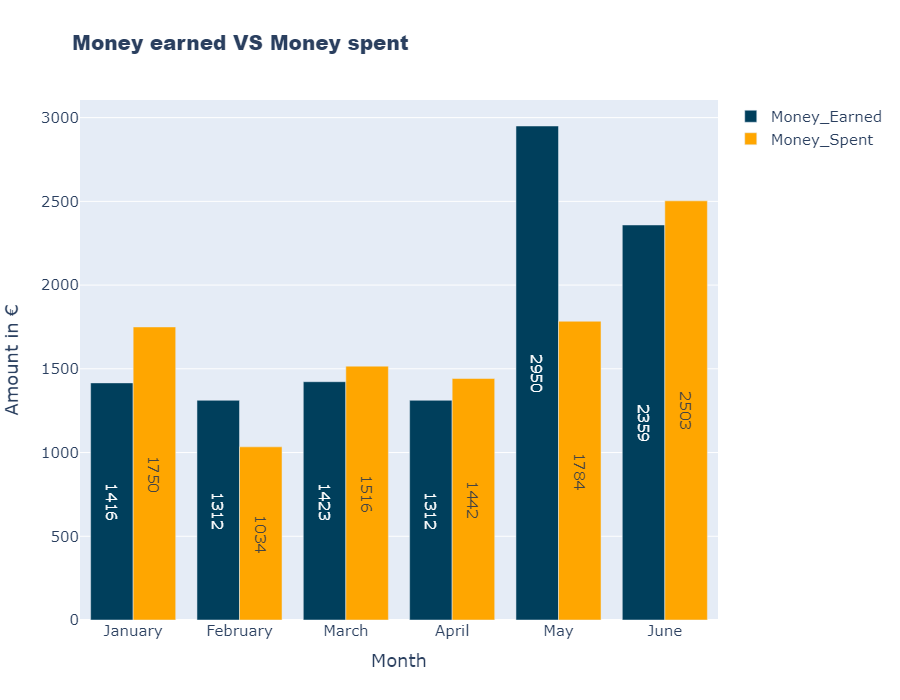

In [135]:
# give the negative values other colors as the positive ones
colors = np.where(spent_vs_gained["Money_saved"]<0, 'red', 'green')
colors

array(['red', 'green', 'red', 'red', 'green', 'red'], dtype='<U5')

In [137]:
title="The monthly amount of Money saved"
fig = px.bar(spent_vs_gained["Money_saved"], 
             height=700,
             width=900,
             text="value",
             title=title,
             labels=dict({"value": "Amount in €", "variable": ""})
            )
fig.update_yaxes(showgrid=False)



'''ADD CHART TITLE AND TITLE FONT SIZE'''
fig.update_layout(title_font_size=20,font_size=15,showlegend=False,title_font_family="Arial Black",title_x=0.08)
fig.update_yaxes(showgrid=True)

#add the Value of each Figure with a nice positioning
fig.update_traces(textposition="inside",insidetextanchor="middle",marker_color=colors)

#save the file 
fig.write_html("Charts\The_monthly_amount_of_Money_saved.html")

fig.show()

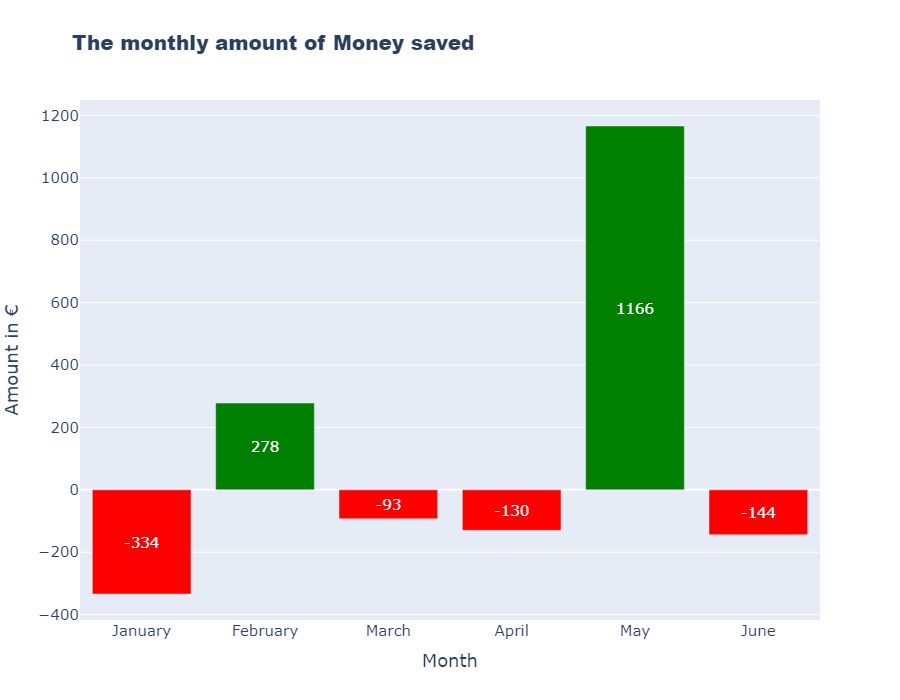

# Transaction Analysis

- now lets analyse where is the money being spent on

In [138]:
data

,Date of value,Booking text,Purpose of use,Beguenstigter/Zahlungspflichtiger,Booking amount,Month,Money_Earned,Money_Spent,Art of transaction
0,2022-06-30,ONLINE-UEBERWEISUNG,"SVWZ+XNXTLVX PAYOPDATUM XX.XX.XXXX, XX.XX UHRI...",PPRO Payment Services SA,-3,June,NaN,-3.00,Others
1,2022-06-30,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+OSAK...,Osakii Mainz GmbH,-50,June,NaN,-50.00,Restaurants and Delivery
2,2022-06-29,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+SumU...,Landesbank Hessen-Thuringen Girozentrale,-7,June,NaN,-7.00,Others
3,2022-06-29,FOLGELASTSCHRIFT,EREF+XXXXXXXXXXXXX PP.XXXX.PP PAYPALMREF+XJTJX...,"PayPal (Europe) S.a r.l. et Cie, S.C.A.",-5,June,NaN,-5.00,Others
4,2022-06-28,KARTENZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+REST...,RESTAURANT SAMAN,-14,June,NaN,-14.00,Restaurants and Delivery
...,...,...,...,...,...,...,...,...,...
277,2022-01-03,BARGELDAUSZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+STAD...,SPARKASSE MAINZ,-45,January,NaN,-45.00,ATM Withdraw
278,2022-01-03,GUTSCHR. UEBERWEISUNG,EREF+YYWXXXXXXXXXXXXX PAYPALSVWZ+. Takeaway.co...,"PayPal (Europe) S.a.r.l. et Cie., S.C.A.",12,January,12.00,NaN,Restaurants and Delivery
279,2022-01-03,BARGELDAUSZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+STAD...,SPARKASSE MAINZ,-45,January,NaN,-45.00,ATM Withdraw
280,2022-01-03,BARGELDAUSZAHLUNG,SVWZ+XXXX-XX-XXTXX.XXDebitk.X XXXX-XXABWA+MAIN...,SPARKASSE MAINZ,-45,January,NaN,-45.00,ATM Withdraw


In [139]:
# so we make a new dataframe with only the amount of the spending
money_spent=data[data["Booking amount"]<0]
#alternative:money_spent=data[data["Money_Spent"].isnull() == False]

In [140]:
# we will use groupby to stack the data under each month and each poin of intrest
Data_monthly_spent =money_spent.groupby(['Month','Art of transaction'],as_index=False).sum()
Data_monthly_spent

,Month,Art of transaction,Booking amount,Money_Earned,Money_Spent
0,April,ATM Withdraw,-650,0.00,-650.00
1,April,Groceries,-170,0.00,-170.00
2,April,Health Insurance,-112,0.00,-112.00
3,April,Others,-108,0.00,-108.00
4,April,Rent,-371,0.00,-371.00
5,April,Restaurants and Delivery,-23,0.00,-23.00
6,April,Subscriptions,-8,0.00,-8.00
7,February,ATM Withdraw,-35,0.00,-35.00
8,February,Clothing,-55,0.00,-55.00
9,February,Groceries,-159,0.00,-159.00


In [141]:
# PS: cause we took only the data where money spend is bigger than 0 --> Booking amount == Money spend
Data_monthly_spent['Booking amount']==Data_monthly_spent['Money_Spent']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
dtype: bool

In [142]:
Data_monthly_spent['Booking amount'] = Data_monthly_spent['Booking amount'].abs()
DataMonthly=Data_monthly_spent.reset_index().groupby(['Month', 'Art of transaction'])['Booking amount'].aggregate('first').unstack()
DataMonthly

Art of transaction,ATM Withdraw,Clothing,Groceries,Health Insurance,Others,Rent,Restaurants and Delivery,Subscriptions,Transport
Month,,,,,,,,,
April,650.00,NaN,170.00,112.00,108.00,371.00,23.00,8.00,NaN
February,35.00,55.00,159.00,112.00,278.00,365.00,22.00,8.00,NaN
January,405.00,NaN,133.00,111.00,636.00,365.00,82.00,13.00,5.00
June,220.00,360.00,181.00,NaN,1049.00,371.00,214.00,8.00,100.00
March,500.00,NaN,57.00,112.00,403.00,365.00,66.00,13.00,NaN
May,490.00,30.00,122.00,112.00,453.00,371.00,32.00,8.00,166.00


In [143]:
#here we add the months as numbers so we can sort them
DataMonthly["Months"] = pd.to_datetime(DataMonthly.index, format='%B', errors='coerce').month
DataMonthly.sort_values(by="Months",inplace=True)

In [144]:
DataMonthly

Art of transaction,ATM Withdraw,Clothing,Groceries,Health Insurance,Others,Rent,Restaurants and Delivery,Subscriptions,Transport,Months
Month,,,,,,,,,,
January,405.00,NaN,133.00,111.00,636.00,365.00,82.00,13.00,5.00,1
February,35.00,55.00,159.00,112.00,278.00,365.00,22.00,8.00,NaN,2
March,500.00,NaN,57.00,112.00,403.00,365.00,66.00,13.00,NaN,3
April,650.00,NaN,170.00,112.00,108.00,371.00,23.00,8.00,NaN,4
May,490.00,30.00,122.00,112.00,453.00,371.00,32.00,8.00,166.00,5
June,220.00,360.00,181.00,NaN,1049.00,371.00,214.00,8.00,100.00,6


In [145]:
# the name of the sorted columns "Art of transaction" is unusable so we might delete
DataMonthly.columns.name = None
# we should fill the Nan values with 0 for the charts later on
DataMonthly.fillna(0,inplace=True)

In [146]:
DataMonthly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, January to June
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ATM Withdraw              6 non-null      float64
 1   Clothing                  6 non-null      float64
 2   Groceries                 6 non-null      float64
 3   Health Insurance          6 non-null      float64
 4   Others                    6 non-null      float64
 5   Rent                      6 non-null      float64
 6   Restaurants and Delivery  6 non-null      float64
 7   Subscriptions             6 non-null      float64
 8   Transport                 6 non-null      float64
 9   Months                    6 non-null      int64  
dtypes: float64(9), int64(1)
memory usage: 528.0+ bytes


In [147]:
# the Months column are not relevant now for the show
DataMonthly.drop(["Months"],inplace=True, axis=1)

In [149]:
title="Monthly distribution of the Amount of spent Money"
fig = px.bar(DataMonthly, 
             height=700,
             width=900,
             text="value",
             barmode="group",
              title=title,
             labels=dict({"value": "Amount in €", "variable": "Art of transaction"})
            )
fig.update_yaxes(showgrid=False)



'''ADD CHART TITLE AND TITLE FONT SIZE'''
fig.update_layout(title_font_size=20,font_size=15,showlegend=True,title_font_family="Arial Black",title_x=0.08)
fig.update_yaxes(showgrid=True)

#add the Value of each Figure with a nice positioning
fig.update_traces(textposition="inside",insidetextanchor="middle")

#save the file 
fig.write_html("Charts\Monthly_distribution_of_the_Amount_of_spent_Money.html")


fig.show()

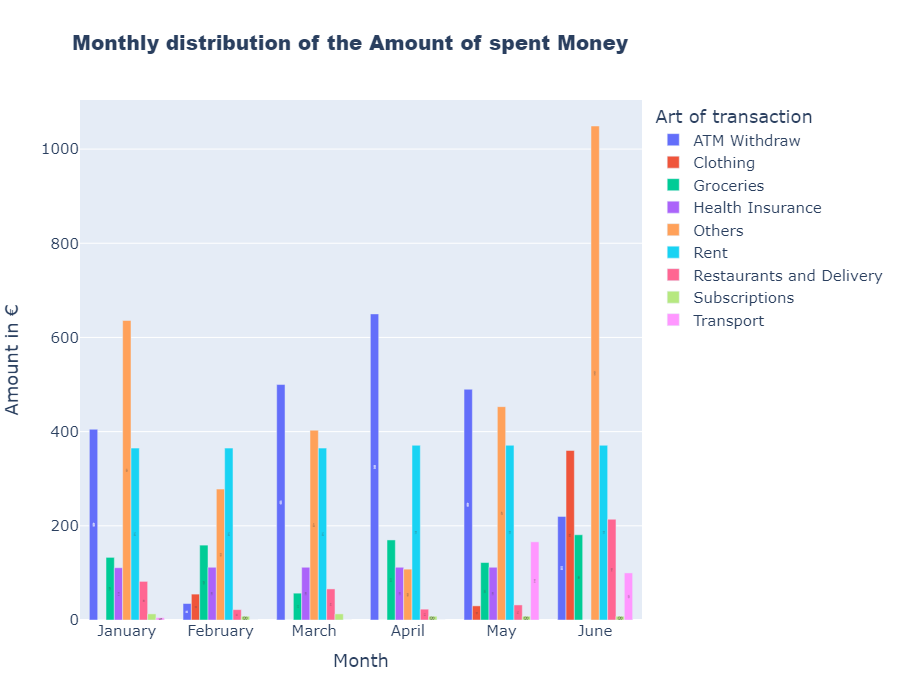

- Tip 1 : check others of june to know where the big amount of money went.
- Tip 2 : delete the variables that has the same value eachmonth (Rent-Subscriptions. etc)
- Tip 3 : do some special comparesions

In [103]:
DataMonthly.drop(['Others',"Rent","Health Insurance","Subscriptions","ATM Withdraw"],inplace=True, axis=1)

In [106]:
title="Monthly distribution of the Amount of spent Money"
fig = px.bar(DataMonthly, 
             height=700,
             width=900,
             color_discrete_sequence=["#003f5c","#7a5195","#ef5675","#ffa600"],
             text="value",
             barmode="group",
             template="simple_white",
             title=title,
             labels=dict({"value": "Amount in €", "variable": "Art of transaction"})
            )
fig.update_yaxes(showgrid=False)



'''ADD CHART TITLE AND TITLE FONT SIZE'''
fig.update_layout(title_font_size=20,font_size=15,showlegend=True,title_font_family="Arial Black",title_x=0.08)
fig.update_yaxes(showgrid=True)

#add the Value of each Figure with a nice positioning
fig.update_traces(textposition="inside",insidetextanchor="middle")

#save the file 
fig.write_html("Charts\Monthly_distribution_of_the_Amount_of_spent_Money_mini.html")


fig.show()

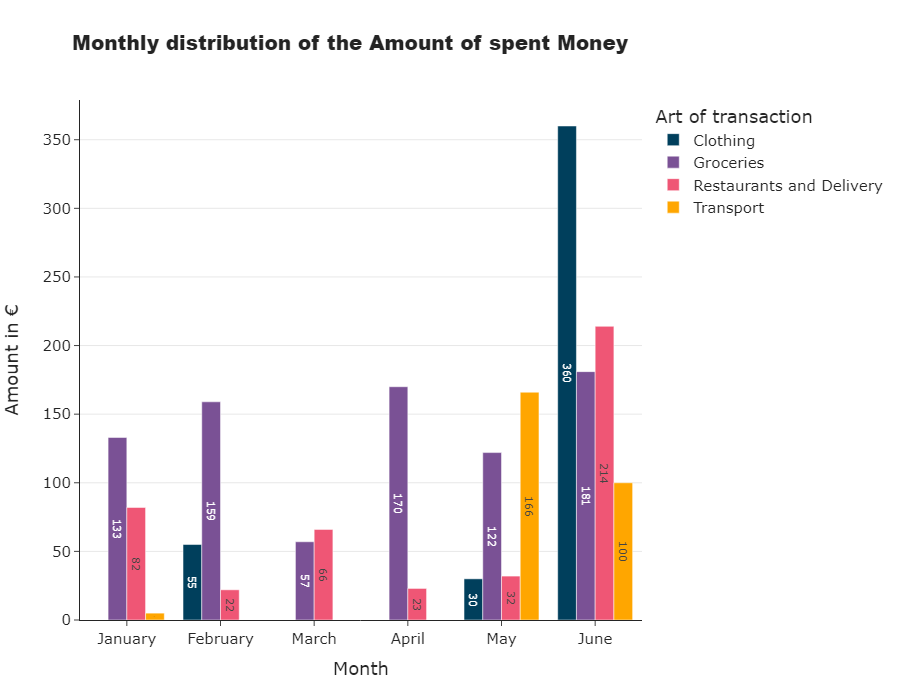

# Next Steps:
- predict how much money gonna be spent and where
- predicts the savings
- never make a future payments with cash so it will be easier to analyse and track the purchases